In [1]:
import librosa
from IPython.display import Audio
array, sampling_rate = librosa.load(librosa.ex("trumpet"))

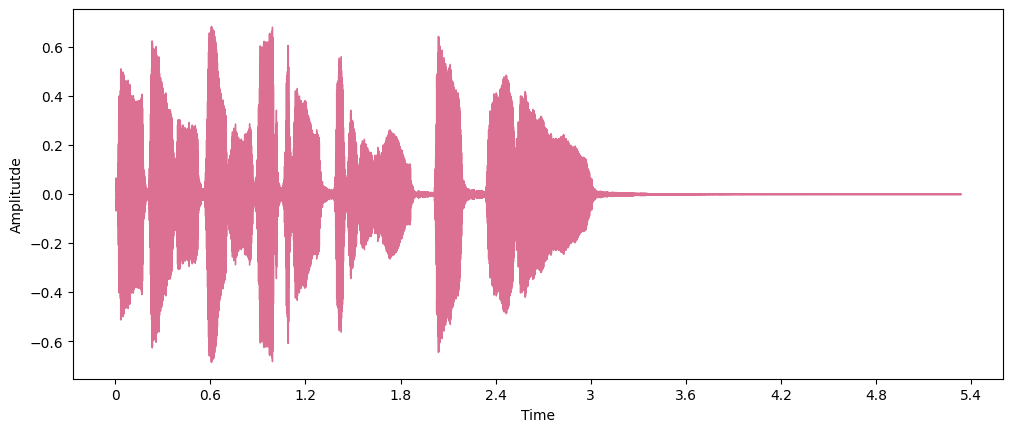

In [2]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
plt.ylabel('Amplitutde')
librosa.display.waveshow(array, sr=sampling_rate, color = 'palevioletred')

In [3]:
Audio(data=array, rate=sampling_rate)

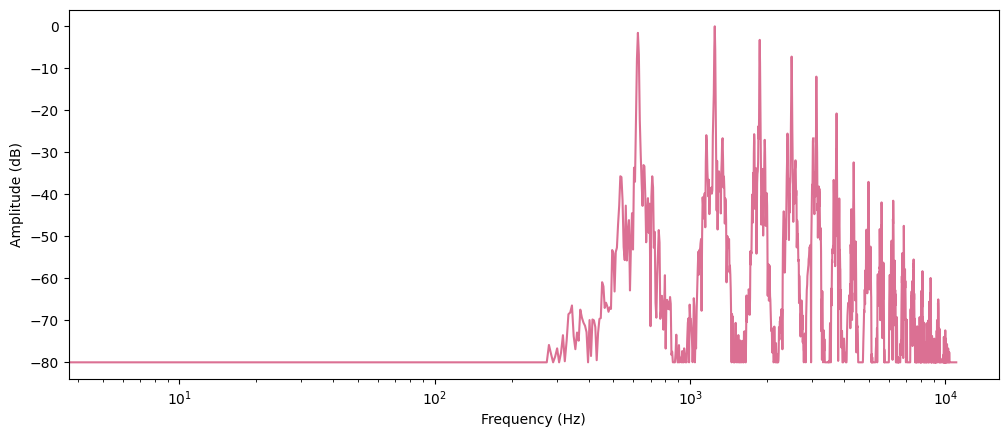

In [6]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db, color = 'palevioletred')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

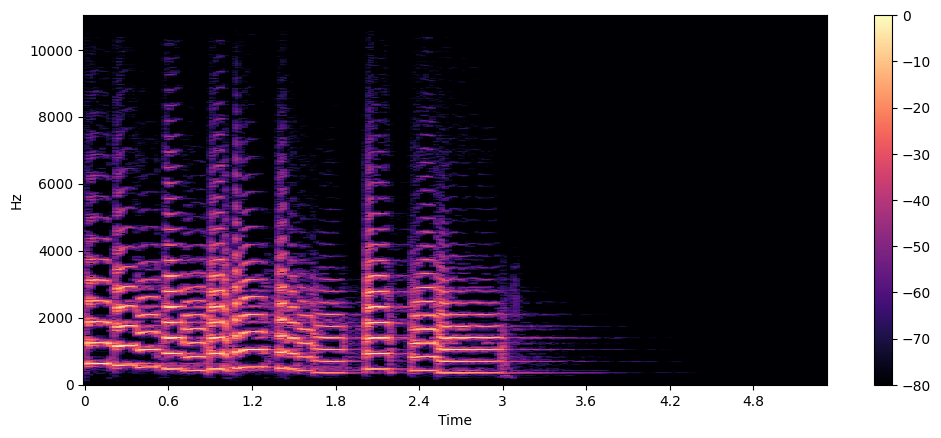

In [7]:
D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

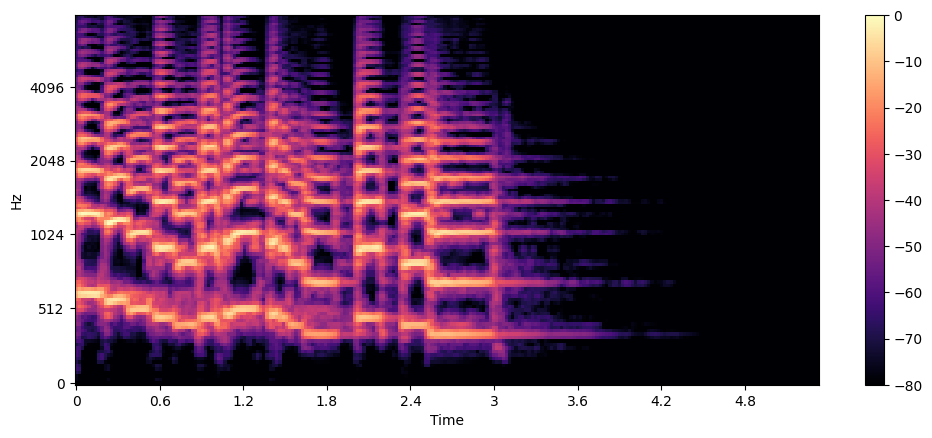

In [8]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

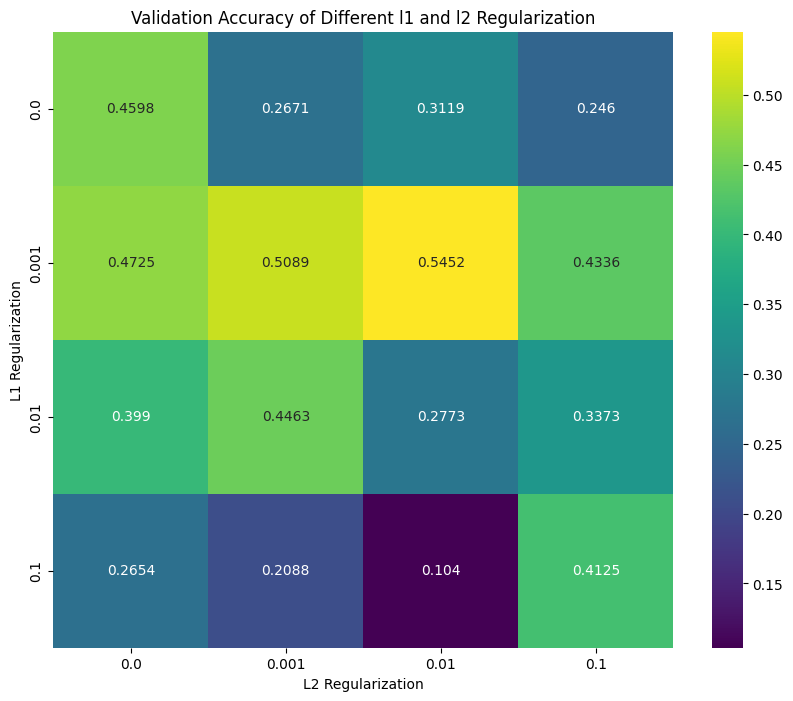

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data as a list of dictionaries
data = [
    {'l1_reg': 0.0, 'l2_reg': 0.0, 'val_acc': 0.4598478376865387},
    {'l1_reg': 0.0, 'l2_reg': 0.1, 'val_acc': 0.2459847778081894},
    {'l1_reg': 0.0, 'l2_reg': 0.001, 'val_acc': 0.2671175003051758},
    {'l1_reg': 0.0, 'l2_reg': 0.01, 'val_acc': 0.31191885471343994},
    {'l1_reg': 0.1, 'l2_reg': 0.0, 'val_acc': 0.2654268741607666},
    {'l1_reg': 0.1, 'l2_reg': 0.1, 'val_acc': 0.41251057386398315},
    {'l1_reg': 0.1, 'l2_reg': 0.001, 'val_acc': 0.20879121124744415},
    {'l1_reg': 0.1, 'l2_reg': 0.01, 'val_acc': 0.10397294908761978},
    {'l1_reg': 0.001, 'l2_reg': 0.0, 'val_acc': 0.47252747416496277},
    {'l1_reg': 0.001, 'l2_reg': 0.1, 'val_acc': 0.43364328145980835},
    {'l1_reg': 0.001, 'l2_reg': 0.001, 'val_acc': 0.5088757276535034},
    {'l1_reg': 0.001, 'l2_reg': 0.01, 'val_acc': 0.5452240109443665},
    {'l1_reg': 0.01, 'l2_reg': 0.0, 'val_acc': 0.3989856243133545},
    {'l1_reg': 0.01, 'l2_reg': 0.1, 'val_acc': 0.3372780978679657},
    {'l1_reg': 0.01, 'l2_reg': 0.001, 'val_acc': 0.4463229179382324},
    {'l1_reg': 0.01, 'l2_reg': 0.01, 'val_acc': 0.2772611975669861}
]

# Convert the list of dictionaries to a Pandas DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by l1_reg and l2_reg values
df_sorted = df.sort_values(by=['l1_reg', 'l2_reg'])

# Pivot the sorted DataFrame
pivoted_df = df_sorted.pivot(index='l1_reg', columns='l2_reg', values='val_acc')

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivoted_df, annot=True, fmt=".4g", cmap="viridis")
plt.title("Validation Accuracy of Different l1 and l2 Regularization")
plt.ylabel("L1 Regularization")
plt.xlabel("L2 Regularization")
plt.show()